In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot: xlabel='Marketing Spend', ylabel='Profit'>

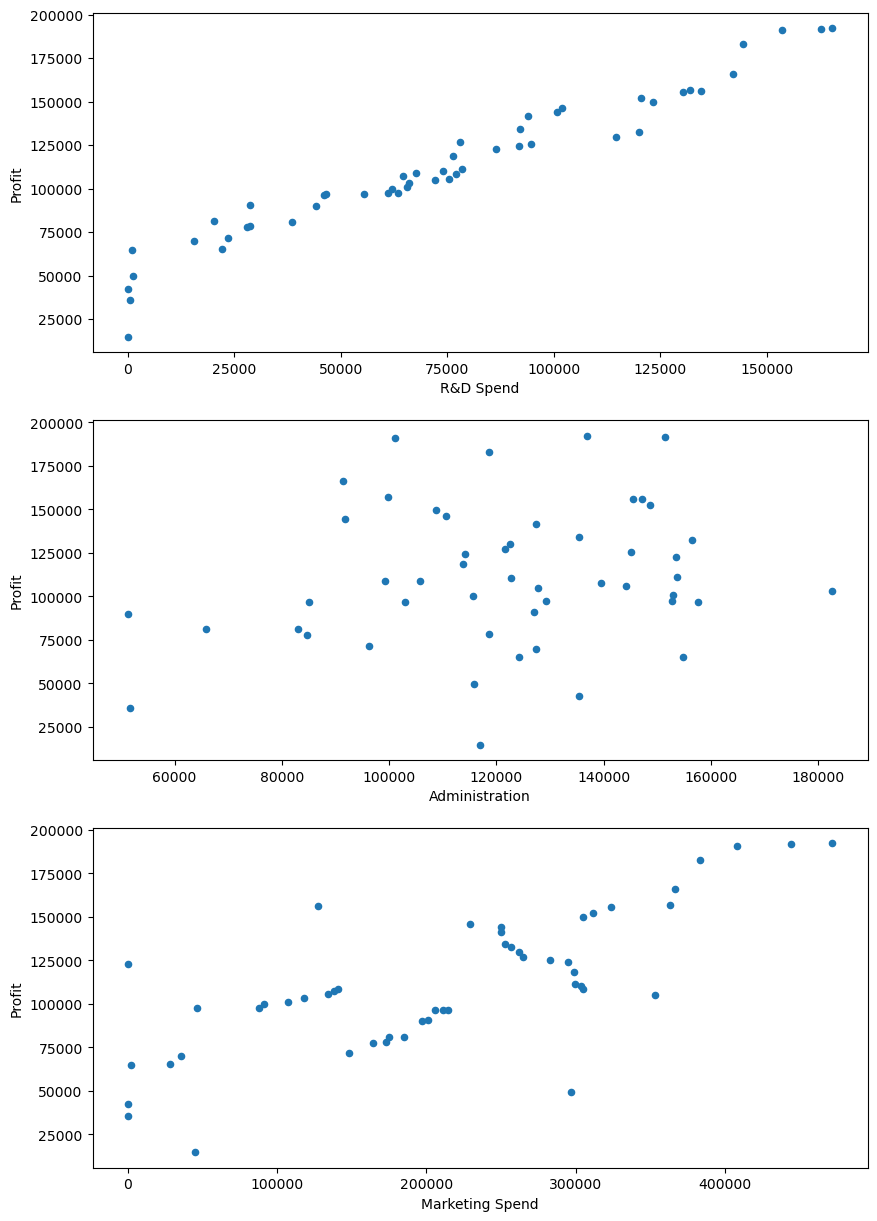

In [4]:
fig, axs = plt.subplots(3,1)   #(rows,cols)
data.plot(kind='scatter', x='R&D Spend', y='Profit', ax=axs[0], figsize=(10,15))
data.plot(kind='scatter', x='Administration', y='Profit', ax=axs[1])
data.plot(kind='scatter', x='Marketing Spend', y='Profit', ax=axs[2])

<AxesSubplot: >

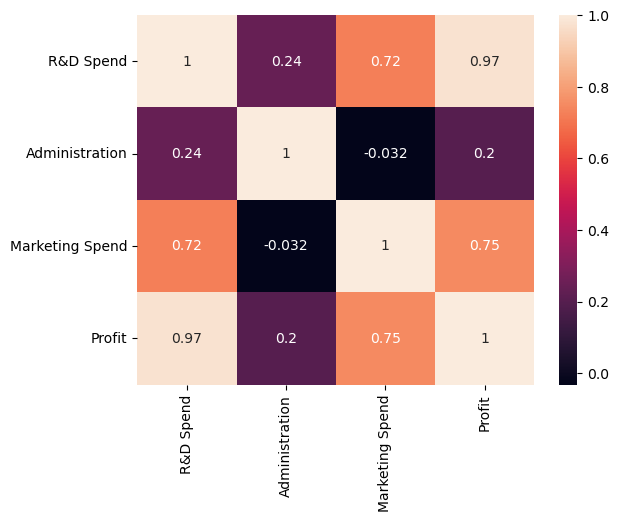

In [5]:
sns.heatmap(data.corr(), annot = True)

In [6]:
feature_cols = ['R&D Spend', 'Administration', 'Marketing Spend'] 
x = data[feature_cols]    # Independent var or Features
y=data.Profit  # Target variable

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 10)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


In [9]:
from sklearn.linear_model import LinearRegression
my_multiple_linear_model = LinearRegression()
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [10]:
my_multiple_linear_model.coef_

array([ 0.80342035, -0.01709379,  0.02447129])

In [11]:
my_multiple_linear_model.intercept_

49655.76957824347

In [12]:
Pred1 = my_multiple_linear_model.predict(X_test)

In [13]:
Pred1

array([ 89007.40524486, 109563.17674741,  65520.98039604,  70626.90662787,
        47340.80998763, 116281.95375606, 172996.33916291,  99716.7473907 ,
       159777.958602  , 158417.77783251])

In [14]:
y_test

37     89949.14
23    108733.99
44     65200.33
42     71498.49
47     42559.73
20    118474.03
3     182901.99
30     99937.59
7     155752.60
6     156122.51
Name: Profit, dtype: float64

### Evaluation on Train Data

In [15]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)

print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))


import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,my_multiple_linear_preds_train)
print("R-squared on Train Data " , r2_sk)

N=X_train.shape[0]
p=X_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 7432.510250520776
MSE on Train Data : 94576540.14942852
RMSE on Train Data : 9725.047051270678
R-squared on Train Data  0.9383444814482027
AdjustedR- squared on Train Data  0.9332065215688863


### Evaluation on Test Data

In [16]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Test Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Test Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))


r2_sk = metrics.r2_score(y_test,my_multiple_linear_preds)
print("R-squared on Test Data " , r2_sk)

N=X_test.shape[0]
p=X_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Test Data " , adj_rsquared)

MAE on Test Data : 2638.3431383196344
MSE on Test Data : 14974326.963161686
RMSE on Test Data : 3869.6675520206754
R-squared on Test Data  0.9917459017235681
AdjustedR- squared on Test Data  0.9876188525853522


In [17]:
data1=pd.read_csv('Sample Startups -data.csv')

In [18]:
data1

,R&D Spend,Administration,Marketing Spend
0,154350,166897.8,401784.1


In [19]:
my_multiple_linear_preds = my_multiple_linear_model.predict(data1)

In [20]:
my_multiple_linear_preds

array([180642.95986139])

# USING POLYNOMIAL REGRESSION

In [21]:
features = data[['R&D Spend', 'Administration', 'Marketing Spend']]  #x
target = data[['Profit']].values   #y

In [22]:
features_poly = PolynomialFeatures(degree=2)

R_and_D_poly = features_poly.fit_transform(features[['R&D Spend']])
Admin_poly = features_poly.fit_transform(features[['Administration']])
Marketing_poly = features_poly.fit_transform(features[['Marketing Spend']])

In [23]:
poly_features = pd.concat([pd.DataFrame(R_and_D_poly),pd.DataFrame(Admin_poly), pd.DataFrame(Marketing_poly)], axis = 1)

In [24]:
poly_features.head()

,0,1,2,0,1,2,0,1,2
0,1.0,165349.20,2.734036e+10,1.0,136897.80,1.874101e+10,1.0,471784.10,2.225802e+11
1,1.0,162597.70,2.643801e+10,1.0,151377.59,2.291517e+10,1.0,443898.53,1.970459e+11
2,1.0,153441.51,2.354430e+10,1.0,101145.55,1.023042e+10,1.0,407934.54,1.664106e+11
3,1.0,144372.41,2.084339e+10,1.0,118671.85,1.408301e+10,1.0,383199.62,1.468419e+11
4,1.0,142107.34,2.019450e+10,1.0,91391.77,8.352456e+09,1.0,366168.42,1.340793e+11


In [25]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, random_state = 6)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 9)
(13, 9)
(37, 1)
(13, 1)


In [27]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

In [28]:
my_model.coef_

array([[ 0.00000000e+00,  6.62651230e-01,  1.19275275e-06,
         1.26608948e-11,  1.38742338e-01, -7.48863918e-07,
        -1.11022302e-16,  4.68084381e-02, -1.13930444e-07]])

In [29]:
my_model.intercept_

array([47405.77670398])

In [30]:
Pred1 = my_model.predict(X_test)

In [31]:
Pred1

array([[ 55270.01632381],
       [ 78056.01878221],
       [ 71953.43838556],
       [107576.83503135],
       [161538.36993491],
       [191268.78248109],
       [166539.67307756],
       [ 88801.98513207],
       [151923.45726619],
       [ 99342.97870152],
       [ 52939.3093622 ],
       [116260.81315427],
       [117230.55314435]])

In [32]:
y_test

array([[ 14681.4 ],
       [ 78239.91],
       [ 81229.06],
       [108733.99],
       [155752.6 ],
       [192261.83],
       [156122.51],
       [ 96712.8 ],
       [132602.65],
       [ 97483.56],
       [ 35673.41],
       [108552.04],
       [122776.86]])

#### Prediction and Evaluation on Train Data

In [33]:
preds_train = my_model.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, preds_train))
print('MSE : ', mean_squared_error(y_train, preds_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, preds_train)))
# print('R2 Score : ', my_model.score(X_train, y_train))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,preds_train)
print("R-squared on Train Data " , r2_sk)

N=X_train.shape[0]
p=X_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE :  5689.631298333662
MSE :  47815208.83820688
RMSE: 6914.854216699502
R-squared on Train Data  0.9651435052170882
AdjustedR- squared on Train Data  0.9535246736227844


#### Prediction and Evaluation on Test Data

In [34]:
preds = my_model.predict(X_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
# print('R2 score : ', my_model.score(X_test, y_test)) 


r2_sk = metrics.r2_score(y_test,preds)
print("R-squared on Test Data " , r2_sk)

N=X_test.shape[0]
p=X_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Test Data " , adj_rsquared)

MAE :  9847.175758755297
MSE :  208111871.22937843
RMSE: 14426.083017554642
R-squared on Test Data  0.9042627111582646
AdjustedR- squared on Test Data  0.6170508446330585


### Conclusion using Polynomial Regression: Training Accuracy of the model is high but Testing accuracy is low when comparing. This indicates Low Bias and High Variance. So this is a problem of "Overfitting".